# <a id='toc1_'></a>[descriptive analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [descriptive analysis](#toc1_)    
  - [import data](#toc1_1_)    
  - [tables](#toc1_2_)    
  - [pie charts](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls, hlp
import duckdb as ddb

hlp.show_package_version(["pygwalker"])

os.environ["THEME"]="light"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

con = ddb.connect()

🐍 3.12.9 | 📦 pygwalker: 0.4.9.15 | 📦 pandas: 2.3.2 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.3.2 | 📦 pandas-plots: 0.16.0 | 📦 connection-helper: 0.13.0


## <a id='toc1_1_'></a>[import data](#toc0_)

In [2]:
# # * get condensed dataset
df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    )
)

# * CTCAE should be a string with integer values and MUST have a real <NA> as missing
df_csv_condensed["[01.01] CTCAE"] = (df_csv_condensed["[01.01] CTCAE"]
        .astype("Int64")
        .astype(str)
        .replace("<NA>", pd.NA)
)

In [3]:
ids = (pd.read_csv("../data/codebooks/id.csv", sep=";")
    .iloc[:,0]
    .to_list()
)

In [4]:
df_csv_condensed_178 = df_csv_condensed[df_csv_condensed["[00.00] ParticipantID"].isin(ids)]

df_csv_condensed = df_csv_condensed_178

## <a id='toc1_2_'></a>[tables](#toc0_)

In [5]:
# # * list of codes for descriptive tables
stubs = (
        "[01.01]",
        "[01.02]",
        "[01.03]",
        "[02.02]",
        "[02.03]",
        "[02.04]",
        "[03.02]",
        "[03.03]",
        "[03.04]",
        "[03.06]",
        "[03.07]",
        "[03.08]",
        "[03.08.01]",
        "[03.08.02]",
        "[03.09]",
        "[03.10]",
        "[03.10.01]",
        "[03.11]",
        "[03.11.02]",
        "[03.12]",
        "[03.13]",
        "[03.13.01]",
        "[03.13.02]",
        "[03.14]",
        "[03.14.01]",
        "[03.14.02]",
        "[03.15]",
        "[03.17]",
        "[05.01]",
        "[05.02]",
        "[05.03]",
        "[05.04]",
        "[05.05]",
        "[05.06]",
        "[05.07]",
        "[05.08]",
        "[05.09]",
        )

# * get full olumn names off of codes
cols = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=stubs)

# cols = df_csv_condensed.columns
print(cols[:5])

['[01.01] CTCAE', '[01.02] Date', '[01.03] Exercise-related', '[02.02] Type', '[02.03] Trigger']


In [6]:
# # ! remove rows with missing CTCAE
df_csv_condensed_cleansed = df_csv_condensed[df_csv_condensed['[01.01] CTCAE'].notna()]

In [7]:
# # * loop over all selected columns
def print_survey(df_in: pd.DataFrame) -> None:
    for col in cols[:]:
        # * skip CTCAE and columns that are not str / object
        if col != "[01.01] CTCAE" and df_in[col].dtype.kind in ("O"):

            # * copy dataframe
            df = df_in.copy()

            # * combine each col with CTCAE, remove missings
            df = df[[col, "[01.01] CTCAE"]].dropna()
            
            # * debug: print column
            # print(col)

            # * remove blanks
            df.iloc[:,0]= df.iloc[:,0].str.strip()

            # * split to create arrays in cells, then explode to have atomic values
            df[col] = df[col].str.split("|")
            df = df.explode(col)

            # * to pivot
            table =(
                tbl.pivot_df(
                    df=df.sort_values(df.columns[-1], ascending=False),
                    dropna=False,
                    data_bar_axis="x",
                    col1_width=400,
                )
                # .format(lambda x: f"{x}")
            )
            display(table)


In [8]:
print_survey(df_csv_condensed_cleansed)

[01.01] CTCAE,1,2,3,Total
[01.02] Date,,,,
Already present,23 (12.9%),8 (4.5%),1 (0.6%),32 (18.0%)
First occurrence,110 (61.8%),34 (19.1%),2 (1.1%),146 (82.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[01.03] Exercise-related,,,,
No,19 (10.7%),7 (4.0%),1 (0.6%),27 (15.3%)
Yes,113 (63.8%),35 (19.8%),2 (1.1%),150 (84.7%)
Total,132 (74.6%),42 (23.7%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[02.02] Type,,,,
Bone injuries,0,0,2 (0.9%),2 (0.9%)
Circulatory problems,28 (12.3%),2 (0.9%),0,30 (13.2%)
Coughing fit,4 (1.8%),0,0,4 (1.8%)
Enuresis,2 (0.9%),0,0,2 (0.9%)
Itching,3 (1.3%),1 (0.4%),0,4 (1.8%)
Muscle cramps,1 (0.4%),0,0,1 (0.4%)
Muscle soreness,4 (1.8%),2 (0.9%),0,6 (2.6%)
Nosebleed,1 (0.4%),1 (0.4%),0,2 (0.9%)
Pain,62 (27.2%),30 (13.2%),2 (0.9%),94 (41.2%)


[01.01] CTCAE,1,2,3,Total
[02.03] Trigger,,,,
Coordination problems,14 (4.9%),8 (2.8%),1 (0.4%),23 (8.1%)
Environmental conditions,5 (1.8%),1 (0.4%),0,6 (2.1%)
Kollision,7 (2.5%),2 (0.7%),0,9 (3.2%)
Medical therapy,67 (23.6%),11 (3.9%),0,78 (27.5%)
Other,1 (0.4%),0,0,1 (0.4%)
Physical strain,94 (33.1%),17 (6.0%),2 (0.7%),113 (39.8%)
Psychological strain,11 (3.9%),2 (0.7%),0,13 (4.6%)
Sturzereignis,21 (7.4%),19 (6.7%),1 (0.4%),41 (14.4%)
Total,220 (77.5%),60 (21.1%),4 (1.4%),284 (100.0%)


[01.01] CTCAE,1,2,3,Total
[02.04] Affected body parts,,,,
Abdomen,7 (3.8%),4 (2.2%),0,11 (5.9%)
Back,7 (3.8%),3 (1.6%),0,10 (5.4%)
Buttocks,5 (2.7%),2 (1.1%),0,7 (3.8%)
Chest,4 (2.2%),1 (0.5%),0,5 (2.7%)
Coccyx,2 (1.1%),0,0,2 (1.1%)
Full body,6 (3.2%),2 (1.1%),1 (0.5%),9 (4.8%)
Head,10 (5.4%),10 (5.4%),0,20 (10.8%)
Innere Medizin,59 (31.7%),6 (3.2%),0,65 (34.9%)
Intestine,2 (1.1%),0,0,2 (1.1%)


[01.01] CTCAE,1,2,3,Total
[03.02] With hospitalization,,,,
No,132 (74.2%),42 (23.6%),1 (0.6%),175 (98.3%)
Weiß nicht,0,0,1 (0.6%),1 (0.6%)
Yes,1 (0.6%),0,1 (0.6%),2 (1.1%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.03] Medical follow-up treatment,,,,
No,121 (68.0%),8 (4.5%),0,129 (72.5%)
Weiß nicht,3 (1.7%),0,0,3 (1.7%)
Yes,9 (5.1%),34 (19.1%),3 (1.7%),46 (25.8%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.04] With delayed therapy protocol,,,,
No,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.06] Increased care needs,,,,
No,132 (74.2%),42 (23.6%),0,174 (97.8%)
Yes,1 (0.6%),0,3 (1.7%),4 (2.2%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.07] With medication administration,,,,
No,111 (64.2%),24 (13.9%),0,135 (78.0%)
Weiß nicht,21 (12.1%),12 (6.9%),0,33 (19.1%)
Yes,0,2 (1.2%),3 (1.7%),5 (2.9%)
Total,132 (76.3%),38 (22.0%),3 (1.7%),173 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.08] Occurrence of fear and uncertainty,,,,
Ja,33 (18.8%),21 (11.9%),2 (1.1%),56 (31.8%)
Nein,99 (56.2%),21 (11.9%),0,120 (68.2%)
Total,132 (75.0%),42 (23.9%),2 (1.1%),176 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.08.01] Affected person,,,,
BeIn the treatment team,9 (10.2%),1 (1.1%),2 (2.3%),12 (13.6%)
For affected individuals,33 (37.5%),19 (21.6%),2 (2.3%),54 (61.4%)
For parents des Betroffenen,2 (2.3%),3 (3.4%),1 (1.1%),6 (6.8%)
For the excercise experts,3 (3.4%),4 (4.5%),1 (1.1%),8 (9.1%)
Mit der Ablehnung weiterer sporttherapheutischer Angebote,5 (5.7%),3 (3.4%),0,8 (9.1%)
Total,52 (59.1%),30 (34.1%),6 (6.8%),88 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.09] Structural adjustment,,,,
Ja,5 (2.8%),4 (2.3%),1 (0.6%),10 (5.6%)
Nein,128 (72.3%),37 (20.9%),2 (1.1%),167 (94.4%)
Total,133 (75.1%),41 (23.2%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.10.01] Approver,,,,
-,104 (58.4%),19 (10.7%),0,123 (69.1%)
Eltern,2 (1.1%),0,0,2 (1.1%)
Medizin,10 (5.6%),14 (7.9%),3 (1.7%),27 (15.2%)
Pflege,15 (8.4%),7 (3.9%),0,22 (12.4%)
Physiotherapie,1 (0.6%),2 (1.1%),0,3 (1.7%)
Psychosozialer Dienst,1 (0.6%),0,0,1 (0.6%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
"[03.11] Application RICE rule (Rest, Ice, Compression, Elevation)",,,,
Ja,2 (1.1%),14 (7.9%),2 (1.1%),18 (10.1%)
Nein,131 (73.6%),28 (15.7%),1 (0.6%),160 (89.9%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.12] With observation,,,,
Ja,3 (1.7%),2 (1.1%),1 (0.6%),6 (3.4%)
Nein,129 (72.5%),40 (22.5%),2 (1.1%),171 (96.1%)
U,1 (0.6%),0,0,1 (0.6%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.13] Stop,,,,
No,11 (6.2%),5 (2.8%),0,16 (9.0%)
Yes,122 (68.5%),37 (20.8%),3 (1.7%),162 (91.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.13.01] Stop or Break,,,,
Break,54 (33.3%),15 (9.3%),1 (0.6%),70 (43.2%)
Cessation,68 (42.0%),22 (13.6%),2 (1.2%),92 (56.8%)
Total,122 (75.3%),37 (22.8%),3 (1.9%),162 (100.0%)


[01.01] CTCAE,1,2,3,Total
[03.14] Adaptations,,,,
-,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,Total
[03.14.01] Adaptations intensity,,,
Communication strategy,3 (5.3%),0,3 (5.3%)
Equipment,2 (3.5%),1 (1.8%),3 (5.3%)
Exercise selection,27 (47.4%),3 (5.3%),30 (52.6%)
Intensity,18 (31.6%),1 (1.8%),19 (33.3%)
Setting,2 (3.5%),0,2 (3.5%)
Total,52 (91.2%),5 (8.8%),57 (100.0%)


[01.01] CTCAE,1,2,Total
[03.14.02] Adaptations duration,,,
Ab jetzt für alle Bewegungseinheiten mit allen Patient*innen,3 (7.3%),0,3 (7.3%)
Für die gesamte Therapiephase,8 (19.5%),0,8 (19.5%)
Nur für diese Einheit,26 (63.4%),4 (9.8%),30 (73.2%)
Total,37 (90.2%),4 (9.8%),41 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.01] Therapy phase,,,,
Acute therapy,120 (67.4%),26 (14.6%),1 (0.6%),147 (82.6%)
Aftercare,9 (5.1%),14 (7.9%),2 (1.1%),25 (14.0%)
Long-term therapy,4 (2.2%),2 (1.1%),0,6 (3.4%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.02] Group size,,,,
Group 2-5,1 (0.6%),1 (0.6%),0,2 (1.1%)
Group 5 to 10,1 (0.6%),4 (2.3%),1 (0.6%),6 (3.4%)
Group over 10,0,6 (3.4%),0,6 (3.4%)
Individual,127 (73.0%),31 (17.8%),2 (1.1%),160 (92.0%)
Total,129 (74.1%),42 (24.1%),3 (1.7%),174 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.03] Age,,,,
02 to 05 years,13 (9.8%),9 (6.8%),0,22 (16.5%)
06 to 09 years,34 (25.6%),6 (4.5%),0,40 (30.1%)
10 to 14 years,30 (22.6%),9 (6.8%),0,39 (29.3%)
15 to 18 years,17 (12.8%),6 (4.5%),1 (0.8%),24 (18.0%)
18+ years,3 (2.3%),3 (2.3%),2 (1.5%),8 (6.0%)
Total,97 (72.9%),33 (24.8%),3 (2.3%),133 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.04] Online,,,,
No,127 (71.8%),40 (22.6%),3 (1.7%),170 (96.0%)
Yes,5 (2.8%),2 (1.1%),0,7 (4.0%)
Total,132 (74.6%),42 (23.7%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.05] As part of testing,,,,
No,129 (72.9%),41 (23.2%),3 (1.7%),173 (97.7%)
Yes,4 (2.3%),0,0,4 (2.3%)
Total,133 (75.1%),41 (23.2%),3 (1.7%),177 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.06] Setting,,,,
At home (via telemedicine),5 (3.1%),2 (1.2%),0,7 (4.3%)
Gym,41 (25.3%),19 (11.7%),2 (1.2%),62 (38.3%)
Hospital corridor,34 (21.0%),7 (4.3%),0,41 (25.3%)
Outside,6 (3.7%),4 (2.5%),1 (0.6%),11 (6.8%)
Patients room,33 (20.4%),8 (4.9%),0,41 (25.3%)
Total,119 (73.5%),40 (24.7%),3 (1.9%),162 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.07] Main motor skill,,,,
Coordination,59 (25.8%),19 (8.3%),3 (1.3%),81 (35.4%)
Endurance,37 (16.2%),11 (4.8%),0,48 (21.0%)
Flexibility,21 (9.2%),3 (1.3%),0,24 (10.5%)
Full body,19 (8.3%),5 (2.2%),0,24 (10.5%)
Relaxation,2 (0.9%),0,0,2 (0.9%)
Speed,5 (2.2%),5 (2.2%),0,10 (4.4%)
Strength,27 (11.8%),12 (5.2%),1 (0.4%),40 (17.5%)
Total,170 (74.2%),55 (24.0%),4 (1.7%),229 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.08] Time point,,,,
1. Time point,50 (38.2%),6 (4.6%),2 (1.5%),58 (44.3%)
2. Time point,46 (35.1%),26 (19.8%),1 (0.8%),73 (55.7%)
Total,96 (73.3%),32 (24.4%),3 (2.3%),131 (100.0%)


[01.01] CTCAE,1,2,3,Total
[05.09] Training condition,,,,
Average,26 (21.0%),10 (8.1%),0,36 (29.0%)
Good,10 (8.1%),2 (1.6%),0,12 (9.7%)
Moderate,53 (42.7%),17 (13.7%),3 (2.4%),73 (58.9%)
Weiß nicht,3 (2.4%),0,0,3 (2.4%)
Total,92 (74.2%),29 (23.4%),3 (2.4%),124 (100.0%)


## <a id='toc1_3_'></a>[pie charts](#toc0_)

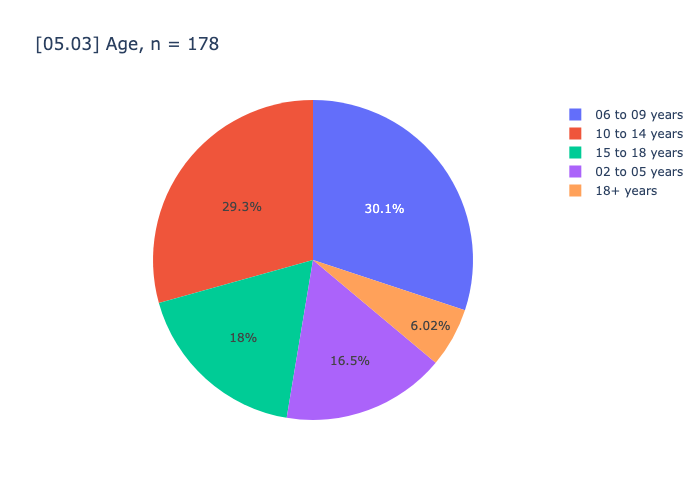

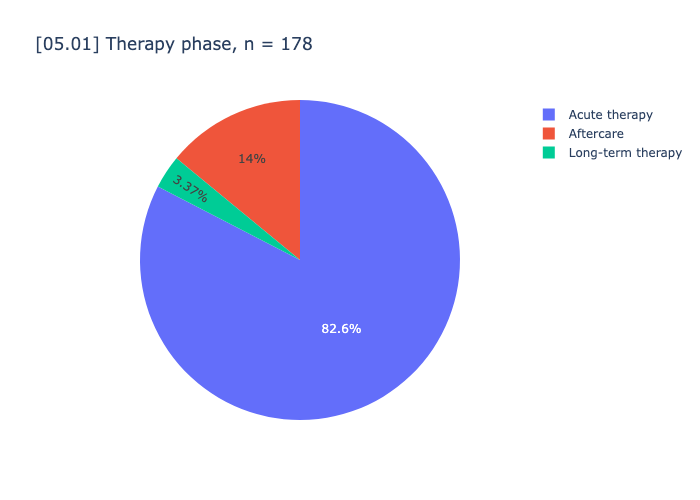

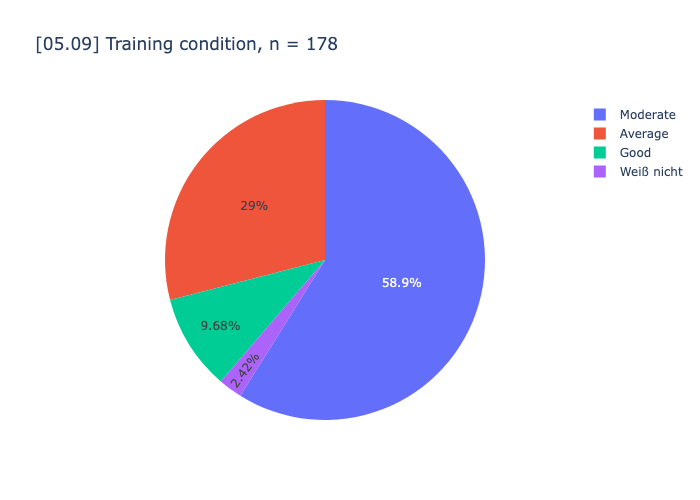

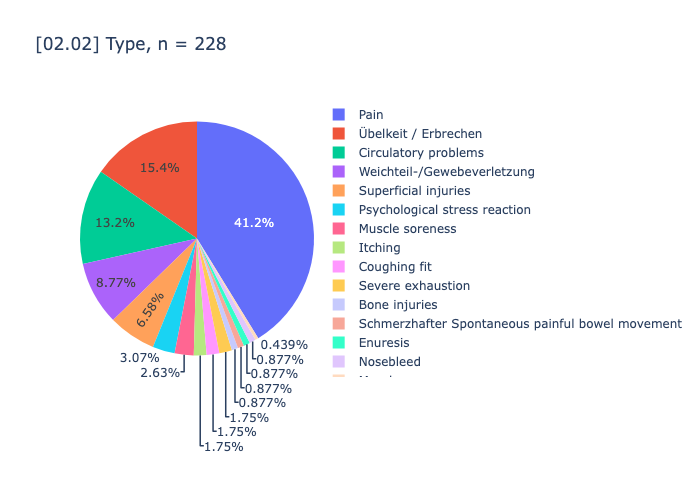

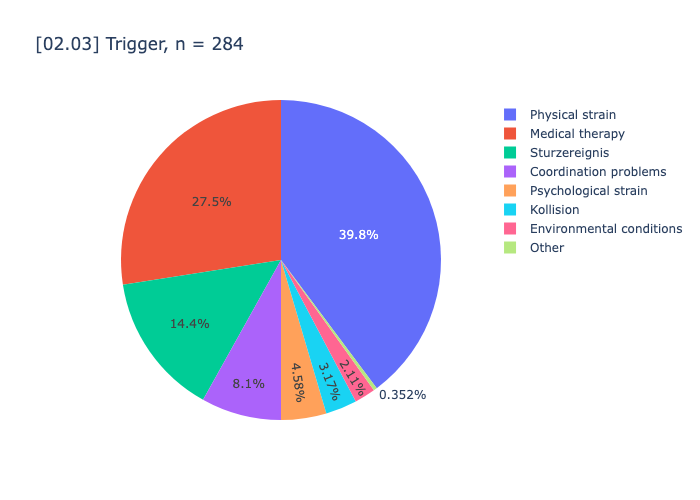

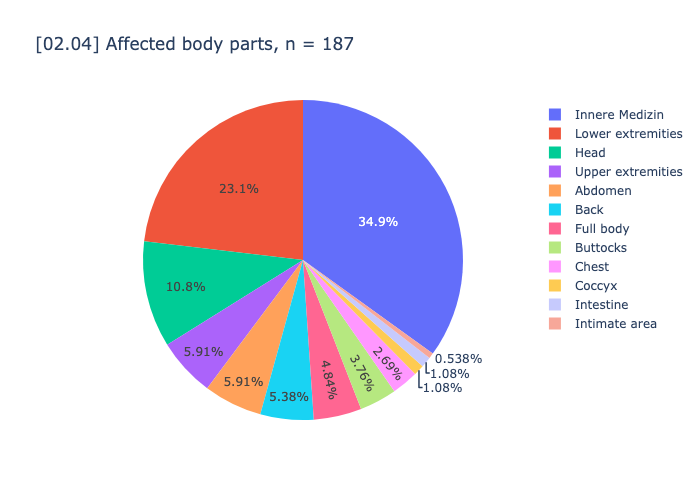

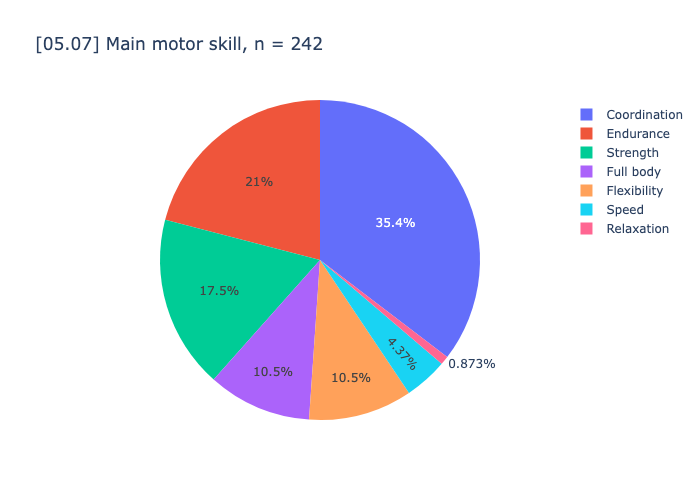

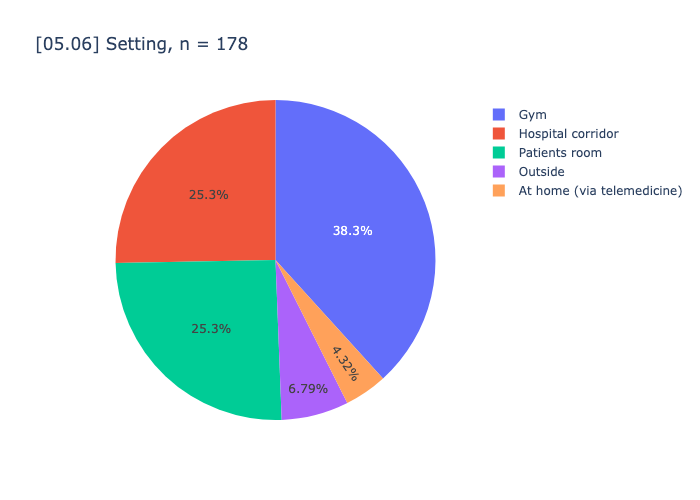

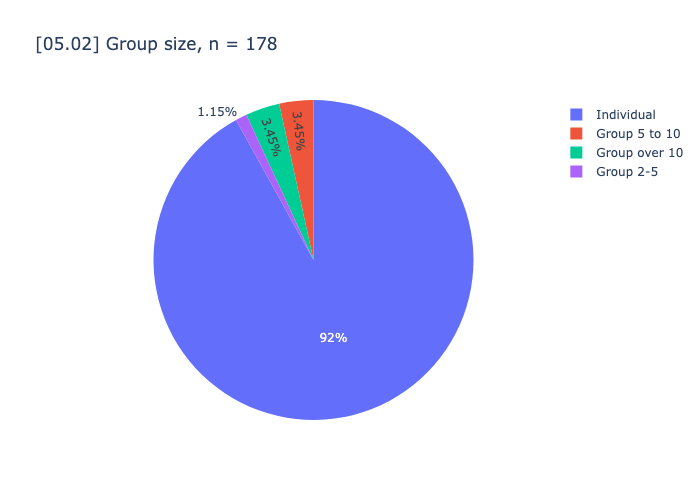

In [9]:
stubs = ["Age", "Therapy", "Training", "Type", "Trigger","Affected", "motor", "Setting", "Group"]

for stub in stubs[:]:
    df_pie = df_csv_condensed_cleansed.copy()
    col = df_pie.find_cols([stub])[0]
    # print(col)

    # * split to create arrays in cells, then explode to have atomic values
    df_pie[col] = df_pie[col].str.split("|")
    df_pie = df_pie.explode(col)
    n = len(df_pie[col])
    # display(df_pie)

    _=pls.plot_pie(df_pie[col], renderer="png")
